In [249]:
# Load libraries
import pandas as pd
import numpy as np
# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
# Test / Train
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
# Model selection libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skmultilearn.model_selection import iterative_train_test_split
# Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

## Load File

In [2]:
# Read csv files
initial_results = pd.read_csv('mxmh_survey_results.csv')
results = initial_results.copy()

In [3]:
# results.shape
# results.head()
# results.columns

## Data Preparation

In [4]:
# Remove unnecessary features
results.drop(['Timestamp','Permissions','Primary streaming service','Music effects'], axis=1, inplace=True)

In [5]:
# set yes/no values
positive = {'Yes': 1, 'No': 0}

results['While working'] = results['While working'].map(positive)
results['Exploratory'] = results['Exploratory'].map(positive)
results['Foreign languages'] = results['Foreign languages'].map(positive)

In [6]:
# alter dtypes
results['While working'] = results['While working'].fillna(0).astype(int)
results['Foreign languages'] = results['Foreign languages'].fillna(0).astype(int)
results['Anxiety'] = results['Anxiety'].fillna(0).astype(int)
results['Depression'] = results['Depression'].fillna(0).astype(int)
results['Insomnia'] = results['Insomnia'].fillna(0).astype(int)
results['OCD'] = results['OCD'].fillna(0).astype(int)
results['BPM'] = results['BPM'].fillna(results['BPM'].mean()).astype(int)

### Map Mental Health Severity

In [7]:
severe = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1, 10:1}

results['Anxiety'] = np.where(results['Anxiety'] < 6, 0, 1)
results['Depression']  = np.where(results['Depression'] < 6, 0, 1)
results['Insomnia'] = np.where(results['Insomnia'] < 6, 0, 1)
results['OCD'] = np.where(results['OCD'] < 6, 0, 1)

### Create New Features

In [8]:
word = 'Never'
count = np.where(results['Frequency [Classical]'] != word, 1, 0)
count += np.where(results['Frequency [Country]'] != word, 1, 0)
count += np.where(results['Frequency [EDM]'] != word, 1, 0)
count += np.where(results['Frequency [Folk]'] != word, 1, 0)
count += np.where(results['Frequency [Gospel]'] !=word, 1, 0)
count += np.where(results['Frequency [Hip hop]'] != word, 1, 0)
count += np.where(results['Frequency [Jazz]'] != word, 1, 0)
count += np.where(results['Frequency [K pop]'] != word, 1, 0)
count += np.where(results['Frequency [Latin]'] != word, 1, 0)
count += np.where(results['Frequency [Lofi]'] != word, 1, 0)
count += np.where(results['Frequency [Metal]'] != word, 1, 0)
count += np.where(results['Frequency [Pop]'] != word, 1, 0)
count += np.where(results['Frequency [R&B]'] != word, 1, 0)
count += np.where(results['Frequency [Rap]'] != word, 1, 0)
count += np.where(results['Frequency [Rock]'] != word, 1, 0)
count += np.where(results['Frequency [Video game music]'] != word, 1, 0)
results['num_genre'] = count

In [9]:
results.drop(['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
             'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]','Frequency [Rap]',
             'Frequency [Rock]', 'Frequency [Video game music]'], axis=1, inplace=True)

In [10]:
results = pd.get_dummies(results)

## Exploratory Analysis

In [11]:
# results.describe()

In [73]:
sns.set_palette("RdBu_r")

<AxesSubplot:xlabel='Age', ylabel='Count'>

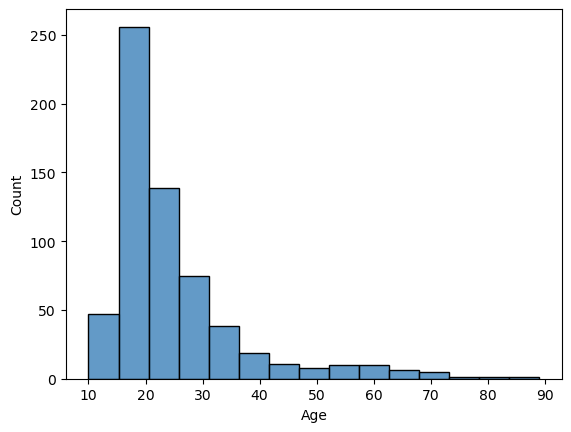

In [74]:
sns.histplot(data=results, x="Age", bins=15)

<AxesSubplot:xlabel='Hours per day', ylabel='Count'>

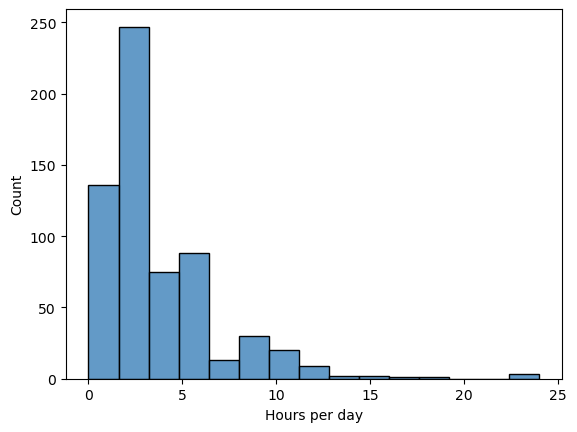

In [75]:
sns.histplot(data=results, x="Hours per day", bins=15)

<AxesSubplot:xlabel='count', ylabel='While working'>

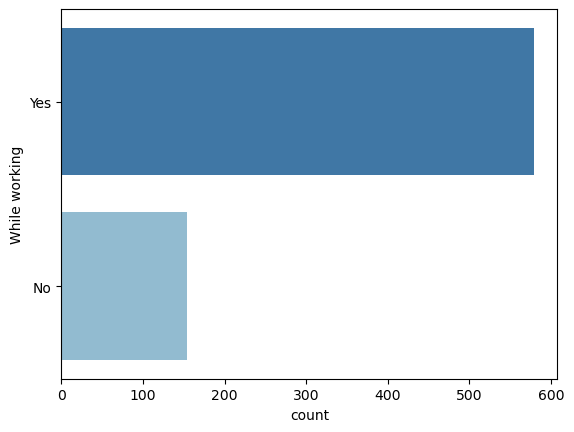

In [76]:
sns.countplot(data=initial_results, y="While working")

<AxesSubplot:xlabel='count', ylabel='Fav genre'>

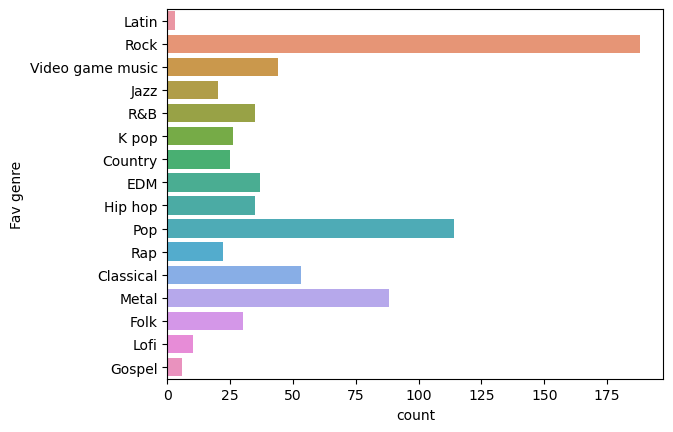

In [77]:
sns.countplot(data=initial_results, y="Fav genre")

<AxesSubplot:xlabel='count', ylabel='Exploratory'>

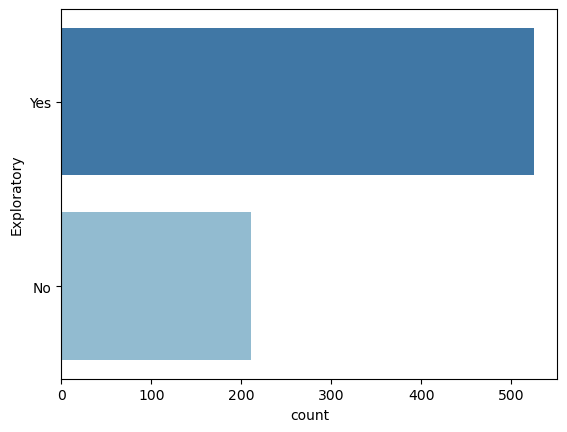

In [78]:
sns.countplot(data=initial_results, y="Exploratory")

<AxesSubplot:xlabel='count', ylabel='Foreign languages'>

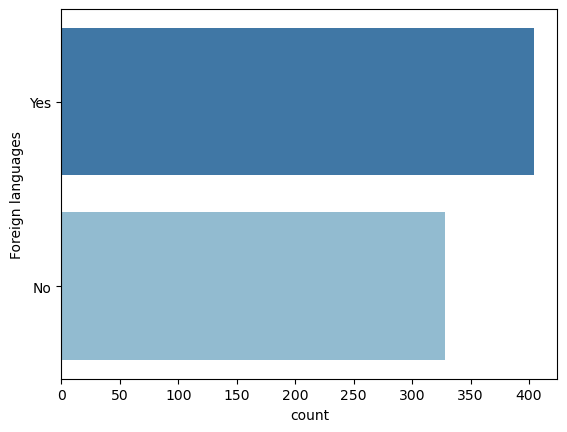

In [79]:
sns.countplot(data=initial_results, y="Foreign languages")

In [18]:
# Remove BPM outlier
results.drop(results[results['BPM']>500].index, inplace=True)

<AxesSubplot:xlabel='BPM', ylabel='Count'>

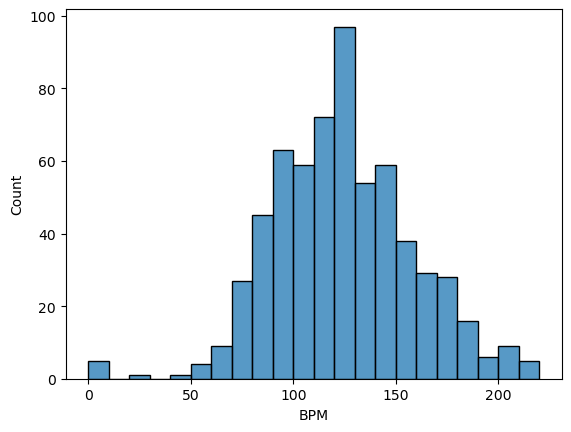

In [19]:
sns.histplot(x=results['BPM'])

<AxesSubplot:xlabel='count', ylabel='Anxiety'>

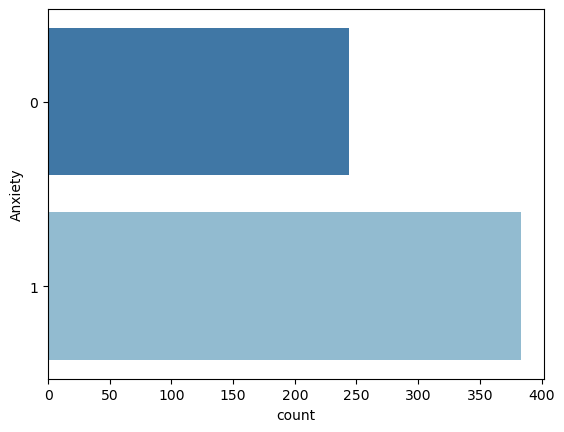

In [80]:
sns.countplot(data=results, y="Anxiety")

<AxesSubplot:xlabel='count', ylabel='Depression'>

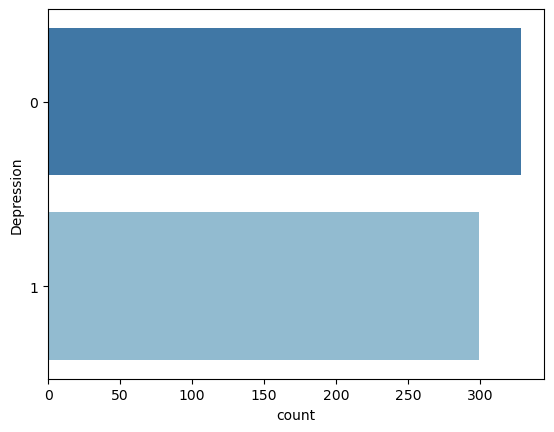

In [81]:
sns.countplot(data=results, y="Depression")

<AxesSubplot:xlabel='count', ylabel='Insomnia'>

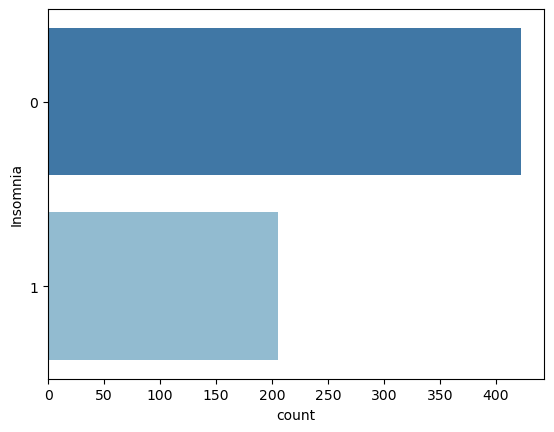

In [82]:
sns.countplot(data=results, y="Insomnia")

<AxesSubplot:xlabel='count', ylabel='OCD'>

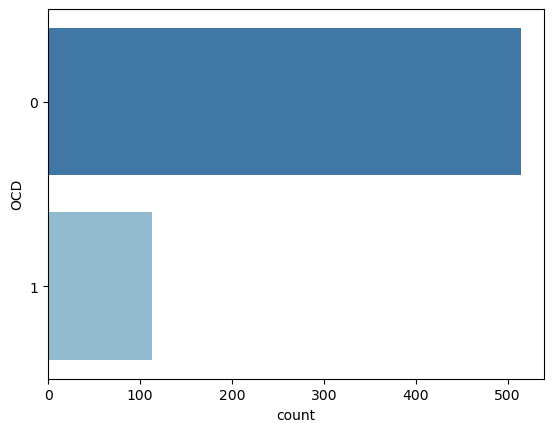

In [83]:
sns.countplot(data=results, y="OCD")

<AxesSubplot:xlabel='num_genre', ylabel='Count'>

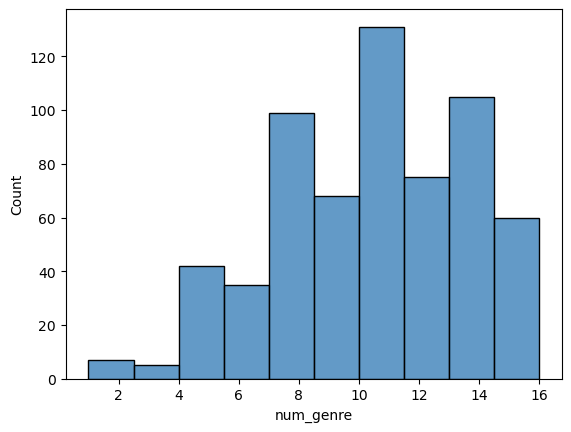

In [84]:
sns.histplot(x=results['num_genre'],bins=10)

## Correlation

In [25]:
# Correlation to Anxiety
corr = results.corrwith(results['Anxiety'])
print(corr.sort_values())

Age                          -0.157355
Fav genre_R&B                -0.066290
Fav genre_Rap                -0.059883
Fav genre_Metal              -0.055960
Fav genre_Classical          -0.045962
Fav genre_Latin              -0.039466
Instrumentalist_No           -0.037009
Fav genre_EDM                -0.033906
Fav genre_Gospel             -0.018217
Composer_No                  -0.006941
Fav genre_Country             0.003132
Composer_Yes                  0.006941
Fav genre_Jazz                0.007518
Fav genre_K pop               0.012186
Fav genre_Lofi                0.023280
Hours per day                 0.027699
Fav genre_Video game music    0.028257
Fav genre_Rock                0.028783
Exploratory                   0.031205
BPM                           0.031530
Instrumentalist_Yes           0.035978
Fav genre_Hip hop             0.036461
Fav genre_Folk                0.051160
Foreign languages             0.052623
While working                 0.055019
Fav genre_Pop            

In [26]:
# Correlation to Depression
corr = results.corrwith(results['Depression'])
print(corr.sort_values())

Age                          -0.086146
Fav genre_Pop                -0.081739
Fav genre_Country            -0.071247
Fav genre_Rap                -0.064281
Composer_No                  -0.063335
Fav genre_Video game music   -0.057203
Fav genre_R&B                -0.049463
Fav genre_Gospel             -0.036397
Fav genre_K pop              -0.031365
Fav genre_Classical          -0.027112
Fav genre_Latin              -0.019927
Instrumentalist_No           -0.002258
Instrumentalist_Yes          -0.001605
Fav genre_Jazz               -0.001129
Fav genre_EDM                 0.004304
Fav genre_Folk                0.009630
BPM                           0.010751
While working                 0.051477
Fav genre_Lofi                0.056873
Composer_Yes                  0.063335
Fav genre_Metal               0.065829
OCD                           0.067401
Exploratory                   0.076223
Fav genre_Rock                0.089556
Hours per day                 0.108714
Fav genre_Hip hop        

In [27]:
# Correlation to OCD
corr = results.corrwith(results['OCD'])
print(corr.sort_values())

Age                          -0.090751
Fav genre_Classical          -0.054483
Foreign languages            -0.045477
Fav genre_Gospel             -0.037570
Fav genre_Folk               -0.035086
Fav genre_Jazz               -0.034475
Fav genre_Hip hop            -0.033319
Fav genre_Latin              -0.032511
Composer_Yes                 -0.030815
Fav genre_Country            -0.018097
Fav genre_Rap                -0.014273
Fav genre_K pop              -0.010722
Instrumentalist_Yes          -0.009947
BPM                          -0.009877
Fav genre_R&B                -0.007906
Fav genre_Metal              -0.000722
Instrumentalist_No            0.014670
Exploratory                   0.022983
Fav genre_Video game music    0.026968
Fav genre_Pop                 0.028896
Composer_No                   0.030815
Fav genre_Rock                0.036742
Fav genre_Lofi                0.039671
num_genre                     0.041646
Fav genre_EDM                 0.048658
Depression               

## Test/Train

In [289]:
# features
# features = results.iloc[:,np.r_[0:6,8:9,10:31]]
features = results[['Age', 'Hours per day', 'Insomnia', 'num_genre']]
# target
target = results[['Anxiety','Depression','OCD']]

In [290]:
train_X, train_y, test_X, test_y = iterative_train_test_split(np.array(features), np.array(target), test_size = 0.4)

In [261]:
scores, pvalues = chi2(train_X, train_y)
pvalues=["{0:.7f}".format(x)for x in pvalues]
i = 0
for column in train_X:
    print(column + ": " + pvalues[i])
    i += 1

Age: 0.0000000
Hours per day: 0.0007078
Insomnia: 0.0001288
num_genre: 0.0293297


## Model Evaluation

In [291]:
def scorePipeline(model, test_y):
    pipe = Pipeline([('scaler', StandardScaler()), ('classifier', model)])
    
    pipe.fit(train_X,train_y)
    print(pipe.score(test_X, test_y))
    
    predictions = pipe.predict(test_X)

    cm = multilabel_confusion_matrix(test_y,predictions)
    return cm

In [292]:
# Classifier Chain
base_lr = LogisticRegression()
model = ClassifierChain(base_lr,order=[1,0,2],random_state=0)
matrix = scorePipeline(model,test_y)

0.35856573705179284


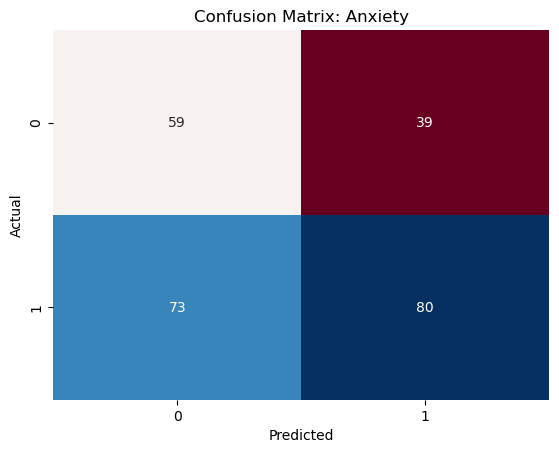

In [293]:
ax= plt.subplot()
sns.heatmap(matrix[0], annot=True, ax=ax, cbar=None, cmap='RdBu', fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix: Anxiety'); 

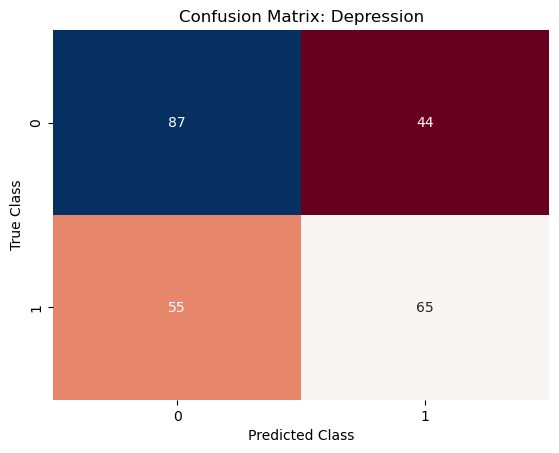

In [294]:
ax= plt.subplot()
sns.heatmap(matrix[1], annot=True, ax=ax, cbar=None, cmap='RdBu', fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_ylabel("True Class"), ax.set_xlabel("Predicted Class")
ax.set_title('Confusion Matrix: Depression'); 

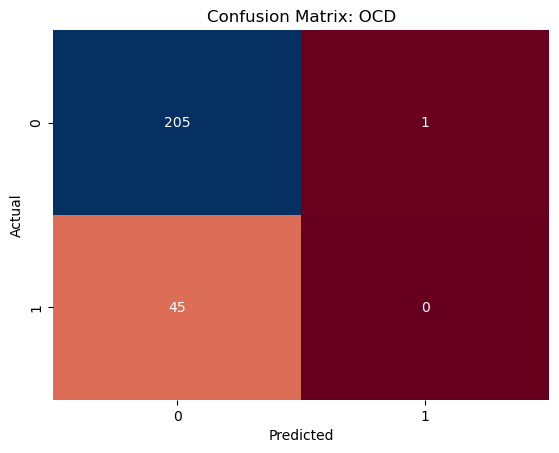

In [295]:
ax= plt.subplot()
sns.heatmap(matrix[2], annot=True, ax=ax, cbar=None, cmap='RdBu', fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix: OCD'); 

In [296]:
# Random Forest Classifier
model = RandomForestClassifier(max_depth=4, random_state=0)
scorePipeline(model,test_y)

0.3187250996015936


array([[[ 21,  77],
        [ 14, 139]],

       [[ 83,  48],
        [ 55,  65]],

       [[206,   0],
        [ 45,   0]]], dtype=int64)

In [ ]:
model = MultiOutputClassifier(base_lr)
scorePipeline(model,test_y)

0.30278884462151395


array([[[ 21,  77],
        [ 20, 133]],

       [[ 87,  44],
        [ 55,  65]],

       [[205,   1],
        [ 45,   0]]], dtype=int64)